In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/machine_downtime.csv')
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [ ]:
print("\nDataset Info:")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\nColumns and Their Data Types:")
print(df.dtypes)


Dataset Info:
Number of Rows: 2500
Number of Columns: 16

Columns and Their Data Types:
Date                            object
Machine_ID                      object
Assembly_Line_No                object
Hydraulic_Pressure(bar)        float64
Coolant_Pressure(bar)          float64
Air_System_Pressure(bar)       float64
Coolant_Temperature            float64
Hydraulic_Oil_Temperature      float64
Spindle_Bearing_Temperature    float64
Spindle_Vibration              float64
Tool_Vibration                 float64
Spindle_Speed(RPM)             float64
Voltage(volts)                 float64
Torque(Nm)                     float64
Cutting(kN)                    float64
Downtime                        object
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2500 non-null   object 
 1   Machine_ID                   2500 non-null   object 
 2   Assembly_Line_No             2500 non-null   object 
 3   Hydraulic_Pressure(bar)      2490 non-null   float64
 4   Coolant_Pressure(bar)        2481 non-null   float64
 5   Air_System_Pressure(bar)     2483 non-null   float64
 6   Coolant_Temperature          2488 non-null   float64
 7   Hydraulic_Oil_Temperature    2484 non-null   float64
 8   Spindle_Bearing_Temperature  2493 non-null   float64
 9   Spindle_Vibration            2489 non-null   float64
 10  Tool_Vibration               2489 non-null   float64
 11  Spindle_Speed(RPM)           2494 non-null   float64
 12  Voltage(volts)               2494 non-null   float64
 13  Torque(Nm)        

In [ ]:
eda_df = df.copy()

In [ ]:
eda_df['Date'] = pd.to_datetime(eda_df['Date'])

In [ ]:
# Identify numerical and categorical Features
numerical_features = eda_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = eda_df.select_dtypes(include=['object']).columns
print("\nNumerical Features:", list(numerical_features))
print("\nCategorical Features:", list(categorical_features))


Numerical Features: ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 'Coolant_Temperature', 'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration', 'Tool_Vibration', 'Spindle_Speed(RPM)', 'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)']

Categorical Features: ['Machine_ID', 'Assembly_Line_No', 'Downtime']



Missing Values Summary:
                             Missing Count  Missing Percentage
Date                                     0                0.00
Machine_ID                               0                0.00
Assembly_Line_No                         0                0.00
Hydraulic_Pressure(bar)                 10                0.40
Coolant_Pressure(bar)                   19                0.76
Air_System_Pressure(bar)                17                0.68
Coolant_Temperature                     12                0.48
Hydraulic_Oil_Temperature               16                0.64
Spindle_Bearing_Temperature              7                0.28
Spindle_Vibration                       11                0.44
Tool_Vibration                          11                0.44
Spindle_Speed(RPM)                       6                0.24
Voltage(volts)                           6                0.24
Torque(Nm)                              21                0.84
Cutting(kN)                   

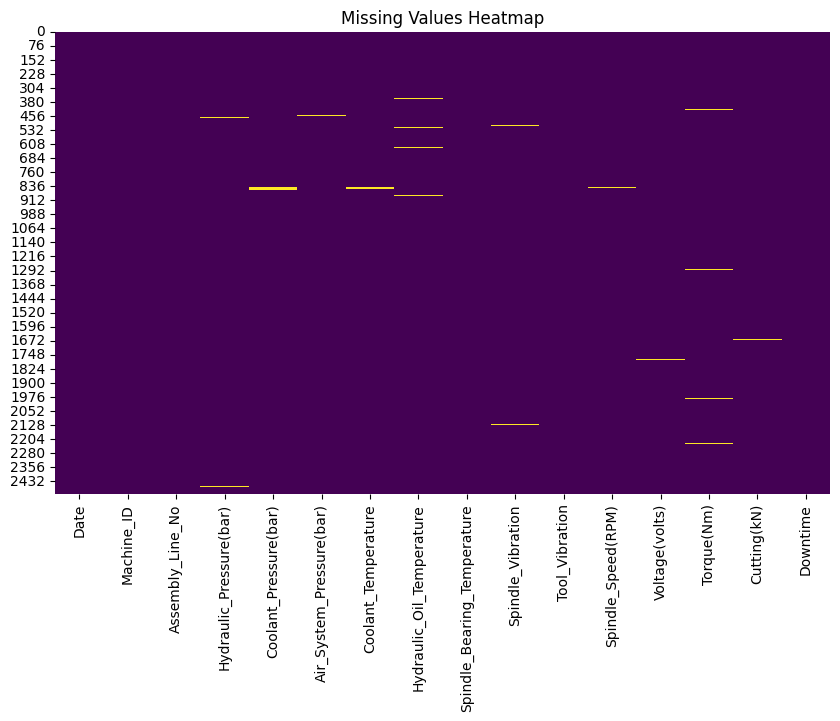

In [ ]:
# Calculate missing values count and percentage
missing_values = eda_df.isnull().sum()
missing_percentage = (eda_df.isnull().sum() / len(eda_df)) * 100

# Combine count and percentage into a DataFrame for better visualization
missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage.round(2)  # Round to 2 decimal places
})

print("\nMissing Values Summary:")
print(missing_summary)


# Check for duplicates

print("\nDuplicate Rows:", eda_df.duplicated().sum())

# Visualize Missing Values

plt.figure(figsize=(10, 6))
sns.heatmap(eda_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


Basic Statistics for Numerical Features:
       Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
count              2490.000000            2481.000000   
mean                101.409084               4.947058   
std                  30.289301               0.997357   
min                 -14.326454               0.325000   
25%                  76.355000               4.462464   
50%                  96.763486               4.939960   
75%                 126.415727               5.518401   
max                 191.000000              11.350000   

       Air_System_Pressure(bar)  Coolant_Temperature  \
count               2483.000000          2488.000000   
mean                   6.499275            18.559887   
std                    0.407279             8.554480   
min                    5.063480             4.100000   
25%                    6.217987            10.400000   
50%                    6.505191            21.200000   
75%                    6.780550            25.600000

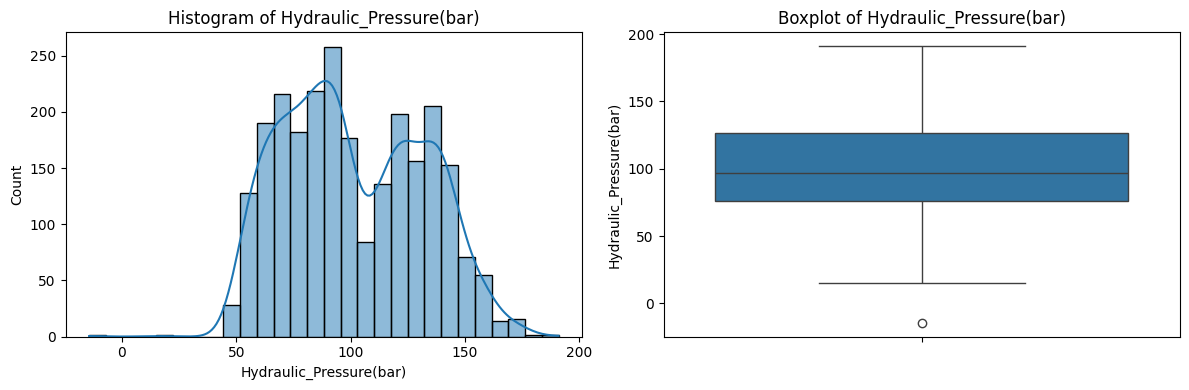

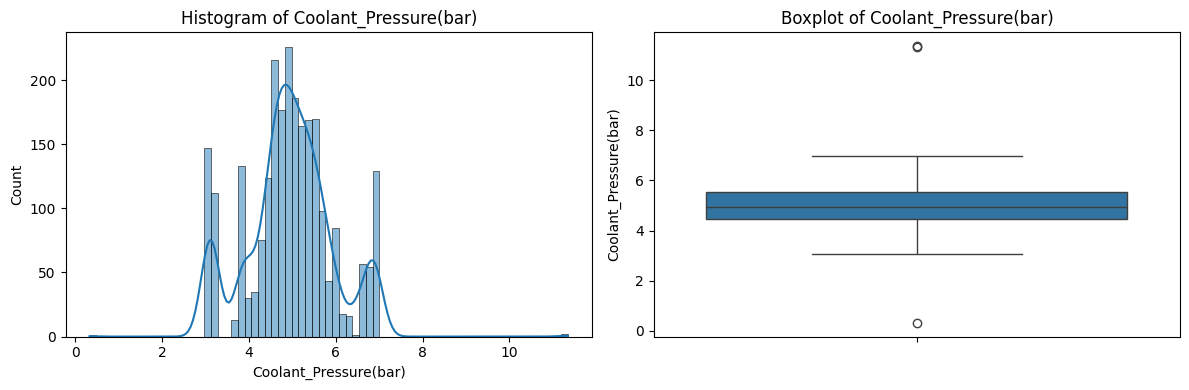

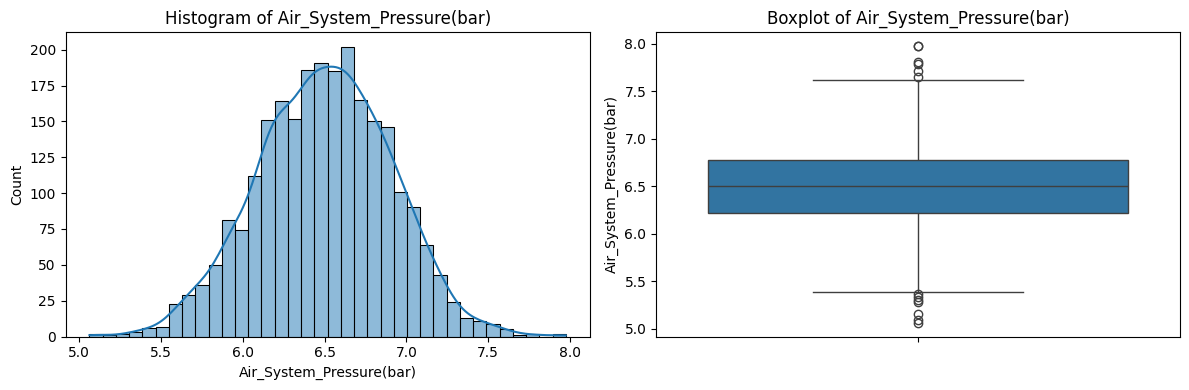

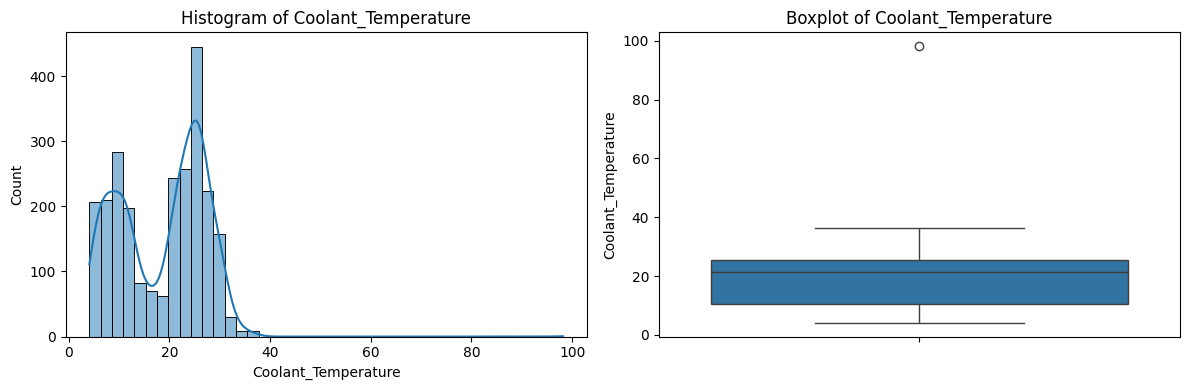

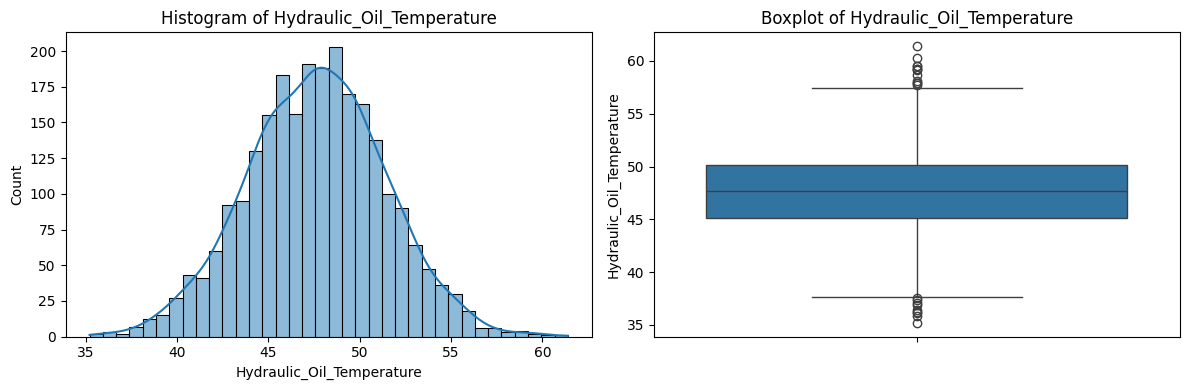

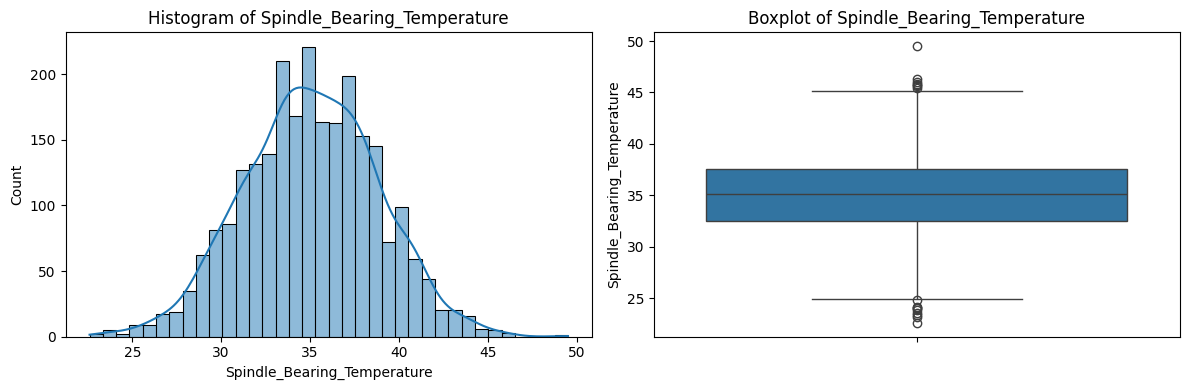

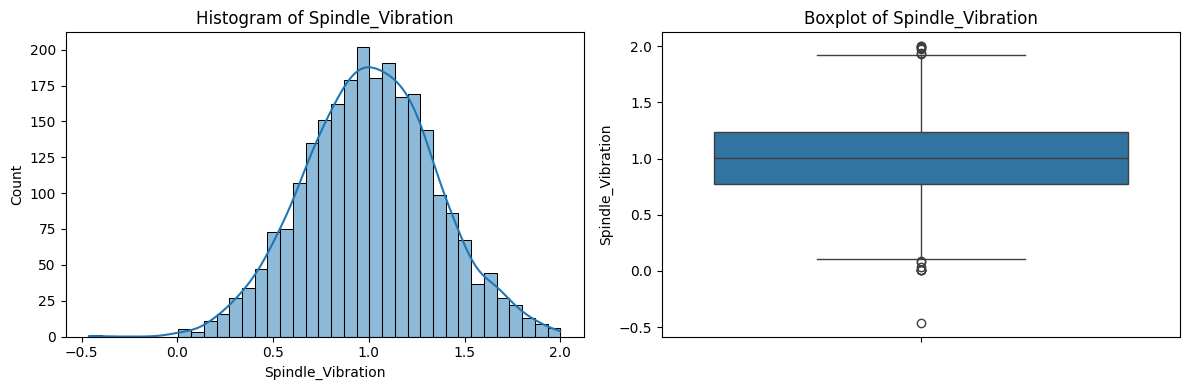

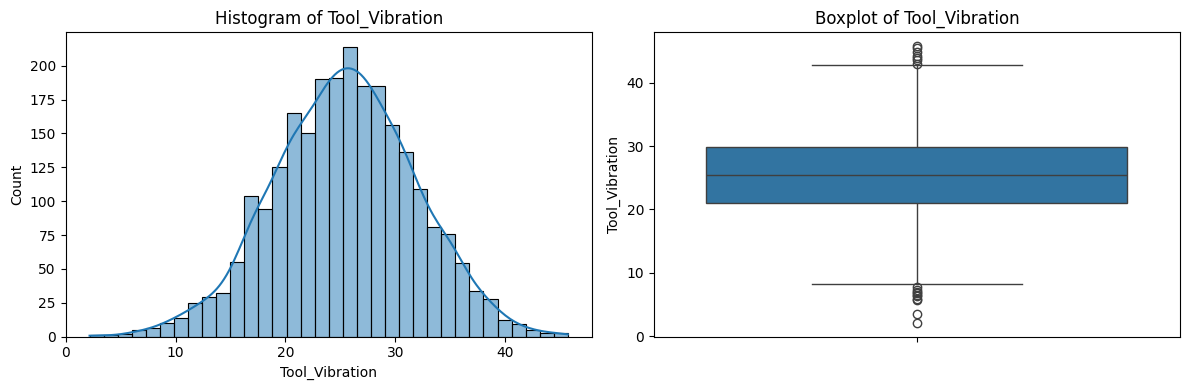

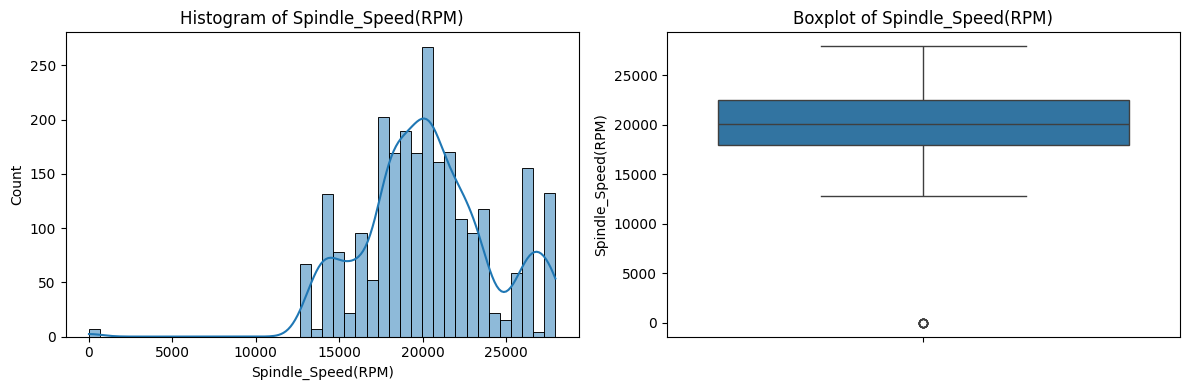

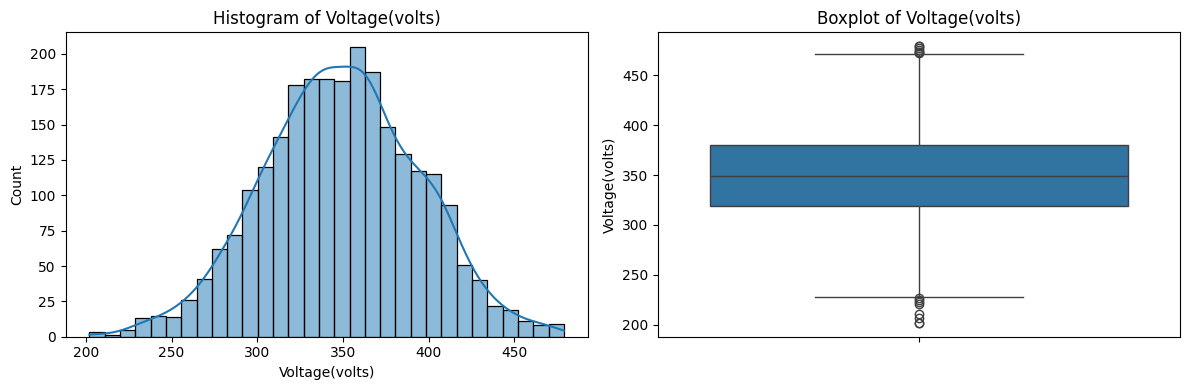

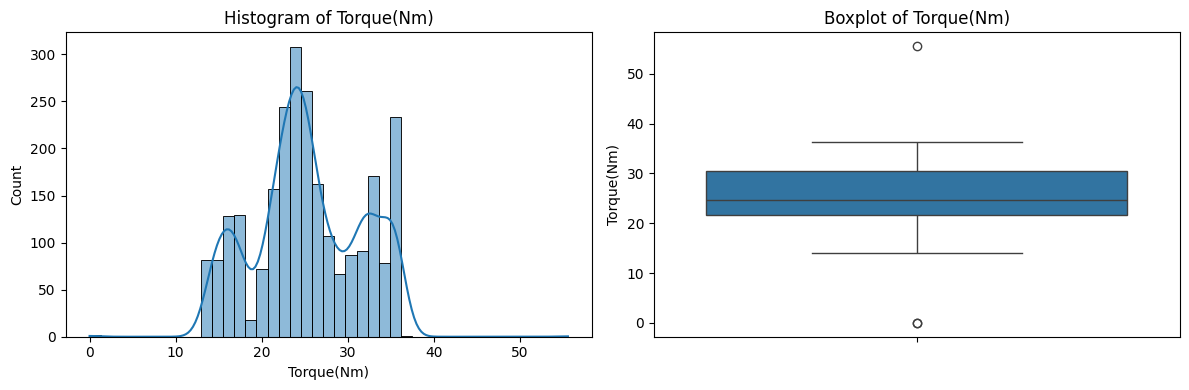

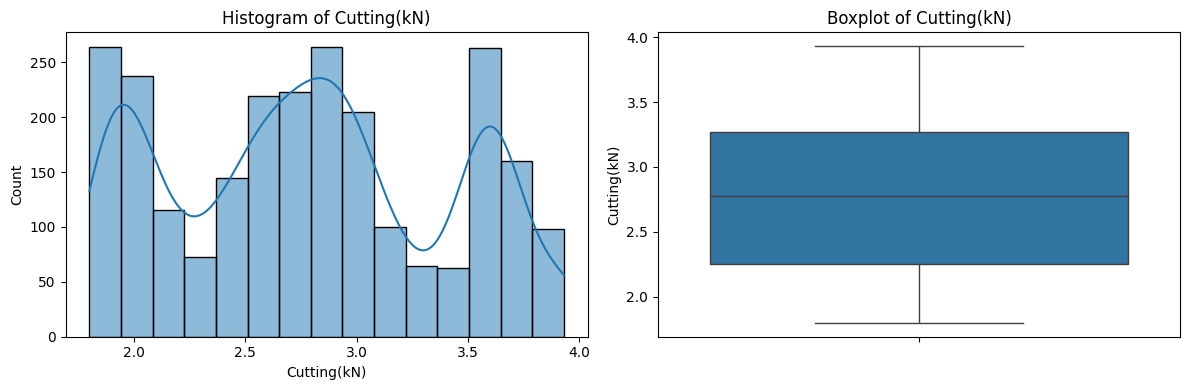

In [ ]:
# Basic Statistics for numerical features

print("\nBasic Statistics for Numerical Features:")
print(eda_df[numerical_features].describe())

# plot histograms and boxplors for numerical features

for col in numerical_features:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(eda_df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1,2,2)
    sns.boxplot(y=eda_df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

In [ ]:
# calculate and print outliers for each numerical feature

for col in numerical_features:
    Q1 = eda_df[col].quantile(0.25)
    Q3 = eda_df[col].quantile(0.75)
    IQR = Q3 - Q1


    #calculate Bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Find Outliers
    outliers = eda_df[(eda_df[col] < lower_bound) | (eda_df[col] > upper_bound)][col]

    print(f"\nOutliers for {col}:")
    print(f"Number of Outliers: {len(outliers)}")
    print(f"Percentage of Outliers: {len(outliers) / len(eda_df) * 100:.2f}%")


Outliers for Hydraulic_Pressure(bar):
Number of Outliers: 1
Percentage of Outliers: 0.04%

Outliers for Coolant_Pressure(bar):
Number of Outliers: 3
Percentage of Outliers: 0.12%

Outliers for Air_System_Pressure(bar):
Number of Outliers: 13
Percentage of Outliers: 0.52%

Outliers for Coolant_Temperature:
Number of Outliers: 1
Percentage of Outliers: 0.04%

Outliers for Hydraulic_Oil_Temperature:
Number of Outliers: 21
Percentage of Outliers: 0.84%

Outliers for Spindle_Bearing_Temperature:
Number of Outliers: 16
Percentage of Outliers: 0.64%

Outliers for Spindle_Vibration:
Number of Outliers: 15
Percentage of Outliers: 0.60%

Outliers for Tool_Vibration:
Number of Outliers: 17
Percentage of Outliers: 0.68%

Outliers for Spindle_Speed(RPM):
Number of Outliers: 7
Percentage of Outliers: 0.28%

Outliers for Voltage(volts):
Number of Outliers: 15
Percentage of Outliers: 0.60%

Outliers for Torque(Nm):
Number of Outliers: 3
Percentage of Outliers: 0.12%

Outliers for Cutting(kN):
Number 

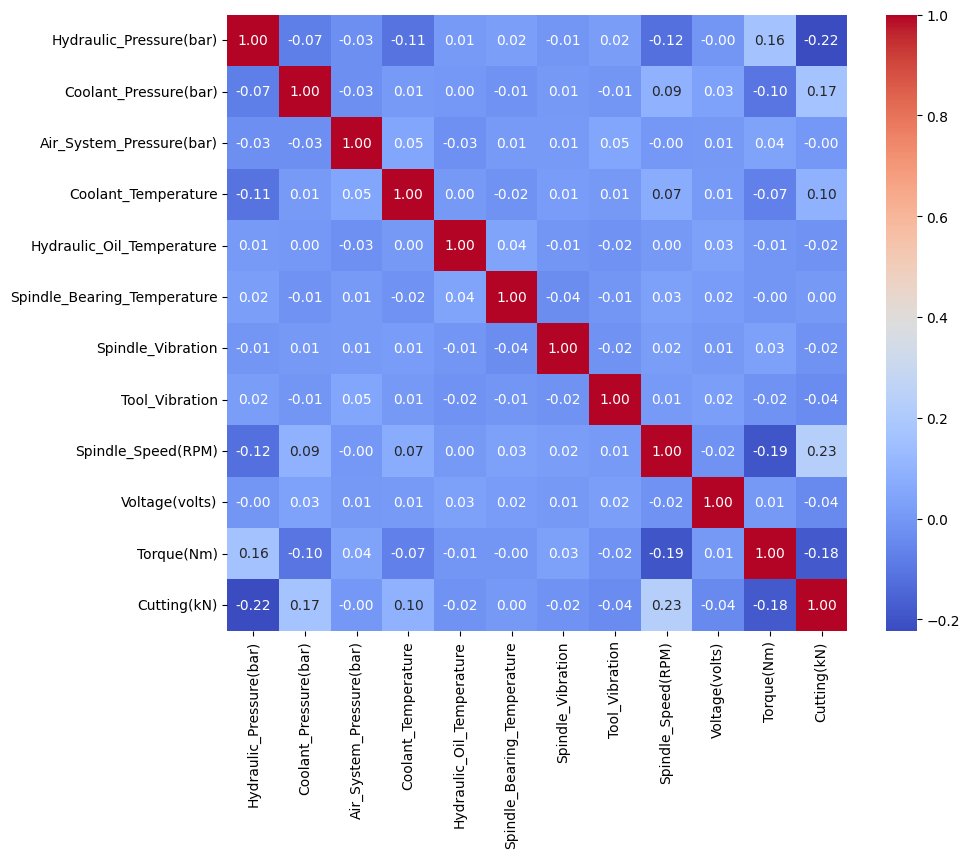

In [ ]:
# correaltion Analysis
# create correlation matrix for numerical features

if len(numerical_features) > 1:
    corr_matrix = eda_df[numerical_features].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt


Value Counts for Machine_ID:
Machine_ID
Makino-L1-Unit1-2013    874
Makino-L3-Unit1-2015    818
Makino-L2-Unit1-2015    808
Name: count, dtype: int64

Number of Unique Values in Machine_ID: 3


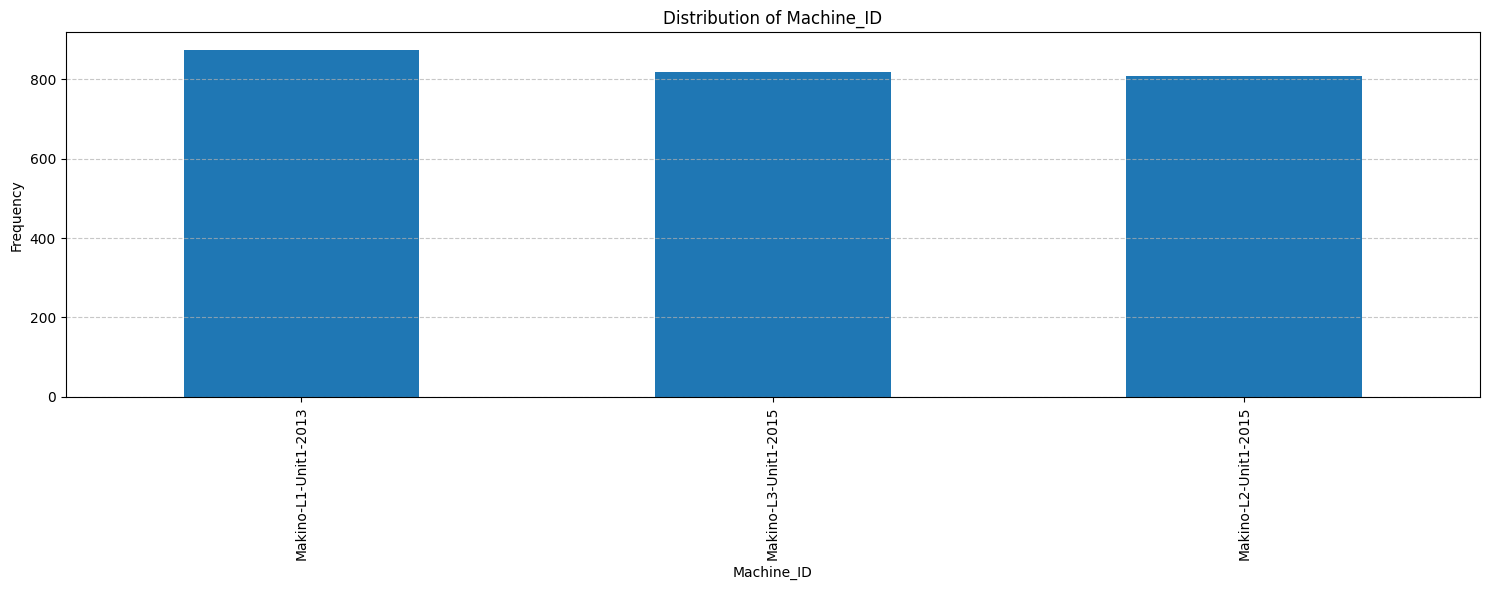


Value Counts for Assembly_Line_No:
Assembly_Line_No
Shopfloor-L1    874
Shopfloor-L3    818
Shopfloor-L2    808
Name: count, dtype: int64

Number of Unique Values in Assembly_Line_No: 3


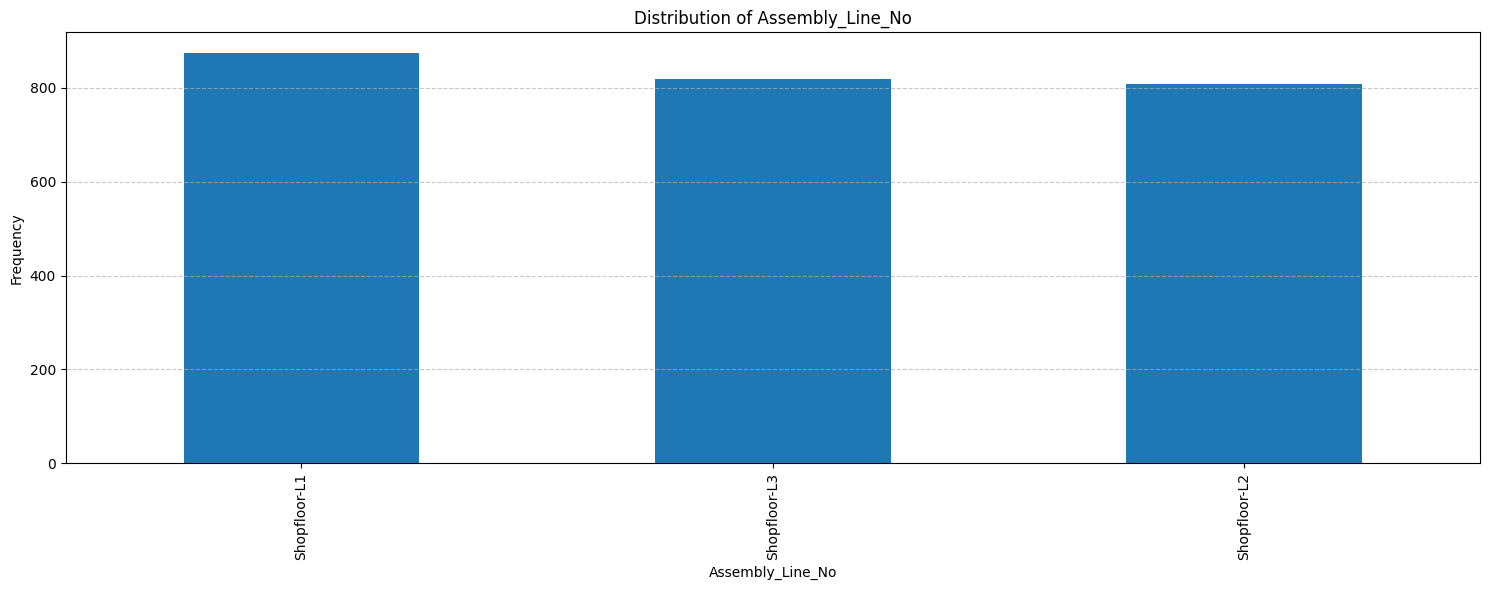


Value Counts for Downtime:
Downtime
Machine_Failure       1265
No_Machine_Failure    1235
Name: count, dtype: int64

Number of Unique Values in Downtime: 2


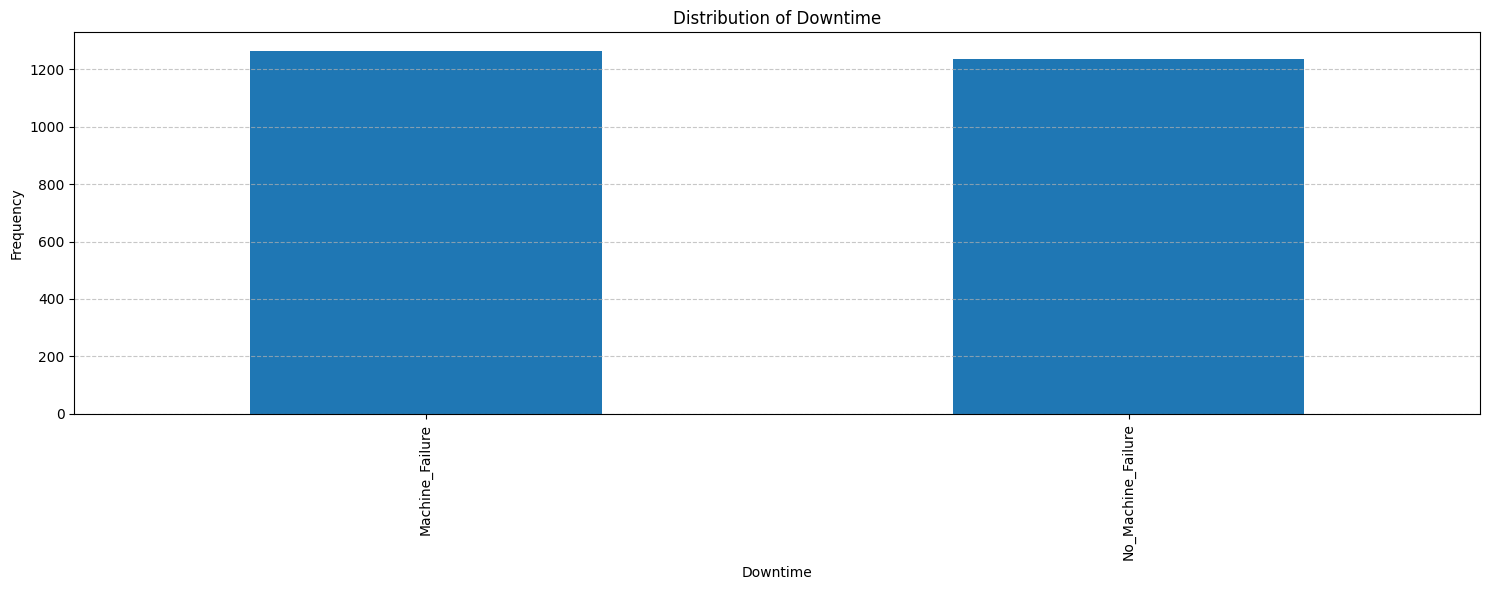

In [ ]:
for col in categorical_features:
    print(f"\nValue Counts for {col}:")
    print(eda_df[col].value_counts())
    print(f"\nNumber of Unique Values in {col}: {eda_df[col].nunique()}")

    # Bar Plot with improved formatting
    plt.figure(figsize=(15, 6))  # Increased figure size
    ax = eda_df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')

    # Improved x-axis formatting
    plt.xticks(rotation=90)  # Vertical labels
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    plt.show()

In [ ]:
# First, ensure the Date column is in datetime format

eda_df['year'] = eda_df['Date'].dt.year
eda_df['month'] = eda_df['Date'].dt.month
eda_df['day'] = eda_df['Date'].dt.day
eda_df['day_of_week'] = eda_df['Date'].dt.dayofweek
eda_df['quarter'] = eda_df['Date'].dt.quarter
eda_df['week_of_year'] = eda_df['Date'].dt.isocalendar().week


drop_columns = ['Date']
eda_df.drop(drop_columns, axis=1, inplace=True)



In [ ]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Machine_ID                   2500 non-null   object 
 1   Assembly_Line_No             2500 non-null   object 
 2   Hydraulic_Pressure(bar)      2490 non-null   float64
 3   Coolant_Pressure(bar)        2481 non-null   float64
 4   Air_System_Pressure(bar)     2483 non-null   float64
 5   Coolant_Temperature          2488 non-null   float64
 6   Hydraulic_Oil_Temperature    2484 non-null   float64
 7   Spindle_Bearing_Temperature  2493 non-null   float64
 8   Spindle_Vibration            2489 non-null   float64
 9   Tool_Vibration               2489 non-null   float64
 10  Spindle_Speed(RPM)           2494 non-null   float64
 11  Voltage(volts)               2494 non-null   float64
 12  Torque(Nm)                   2479 non-null   float64
 13  Cutting(kN)       

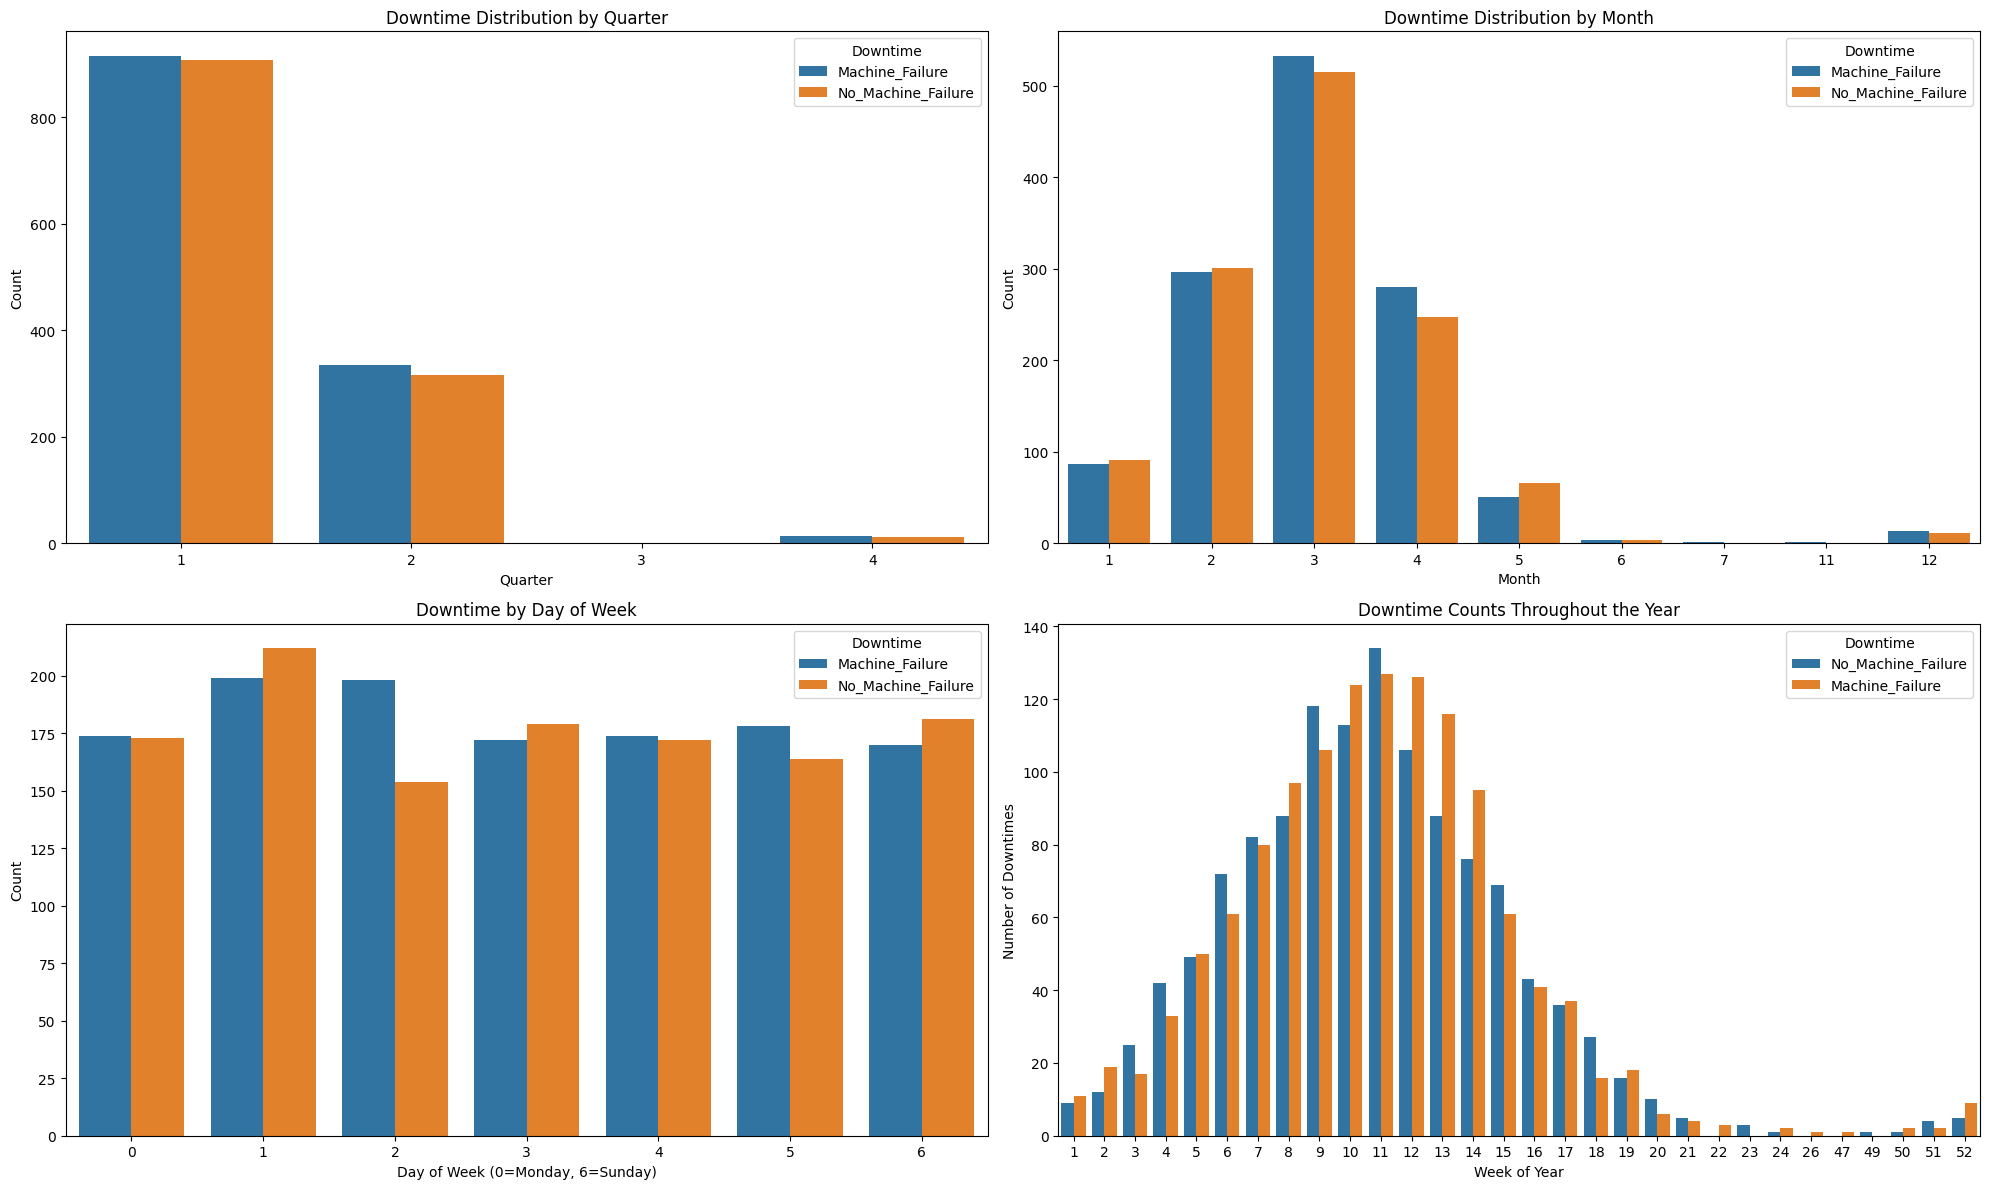

In [ ]:
# Time-based patterns analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Quarter analysis
sns.countplot(data=eda_df, x='quarter', hue='Downtime', ax=ax1)
ax1.set_title('Downtime Distribution by Quarter')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Count')

# Month analysis
sns.countplot(data=eda_df, x='month', hue='Downtime', ax=ax2)
ax2.set_title('Downtime Distribution by Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Count')

# Day of week patterns
sns.countplot(data=eda_df, x='day_of_week', hue='Downtime', ax=ax3)
ax3.set_title('Downtime by Day of Week')
ax3.set_xlabel('Day of Week (0=Monday, 6=Sunday)')
ax3.set_ylabel('Count')

# Daily downtime counts
sns.countplot(data=eda_df, x='week_of_year', hue='Downtime', ax=ax4)
ax4.set_title('Downtime Counts Throughout the Year')
ax4.set_xlabel('Week of Year')
ax4.set_ylabel('Number of Downtimes')

plt.tight_layout()
plt.show()

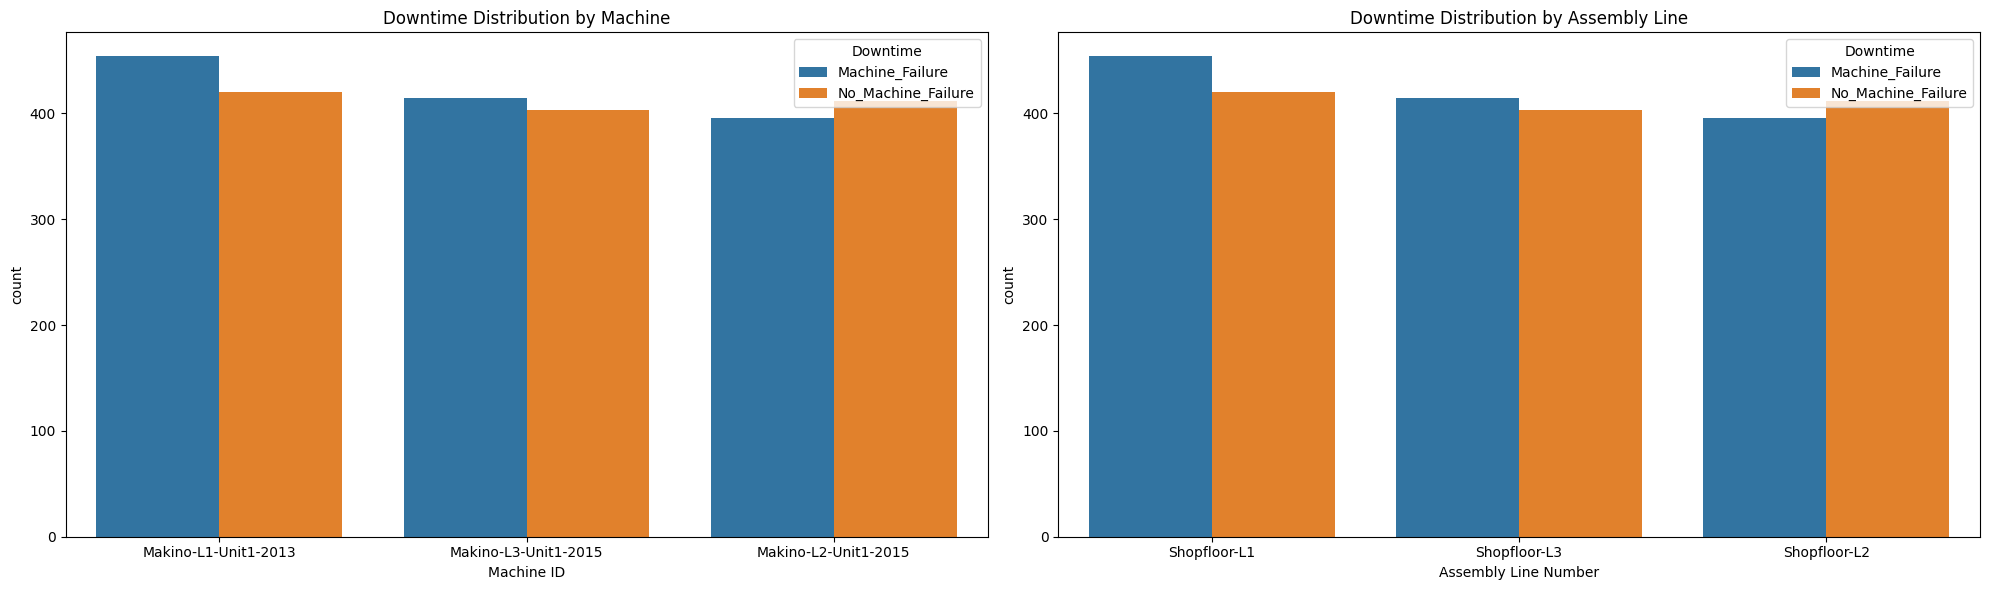

In [ ]:
# Machine and Assembly Line Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.countplot(data=eda_df, x='Machine_ID', hue='Downtime', ax=ax1)
ax1.set_title('Downtime Distribution by Machine')
ax1.set_xlabel('Machine ID')

sns.countplot(data=eda_df, x='Assembly_Line_No', hue='Downtime', ax=ax2)
ax2.set_title('Downtime Distribution by Assembly Line')
ax2.set_xlabel('Assembly Line Number')
plt.tight_layout()
plt.show()



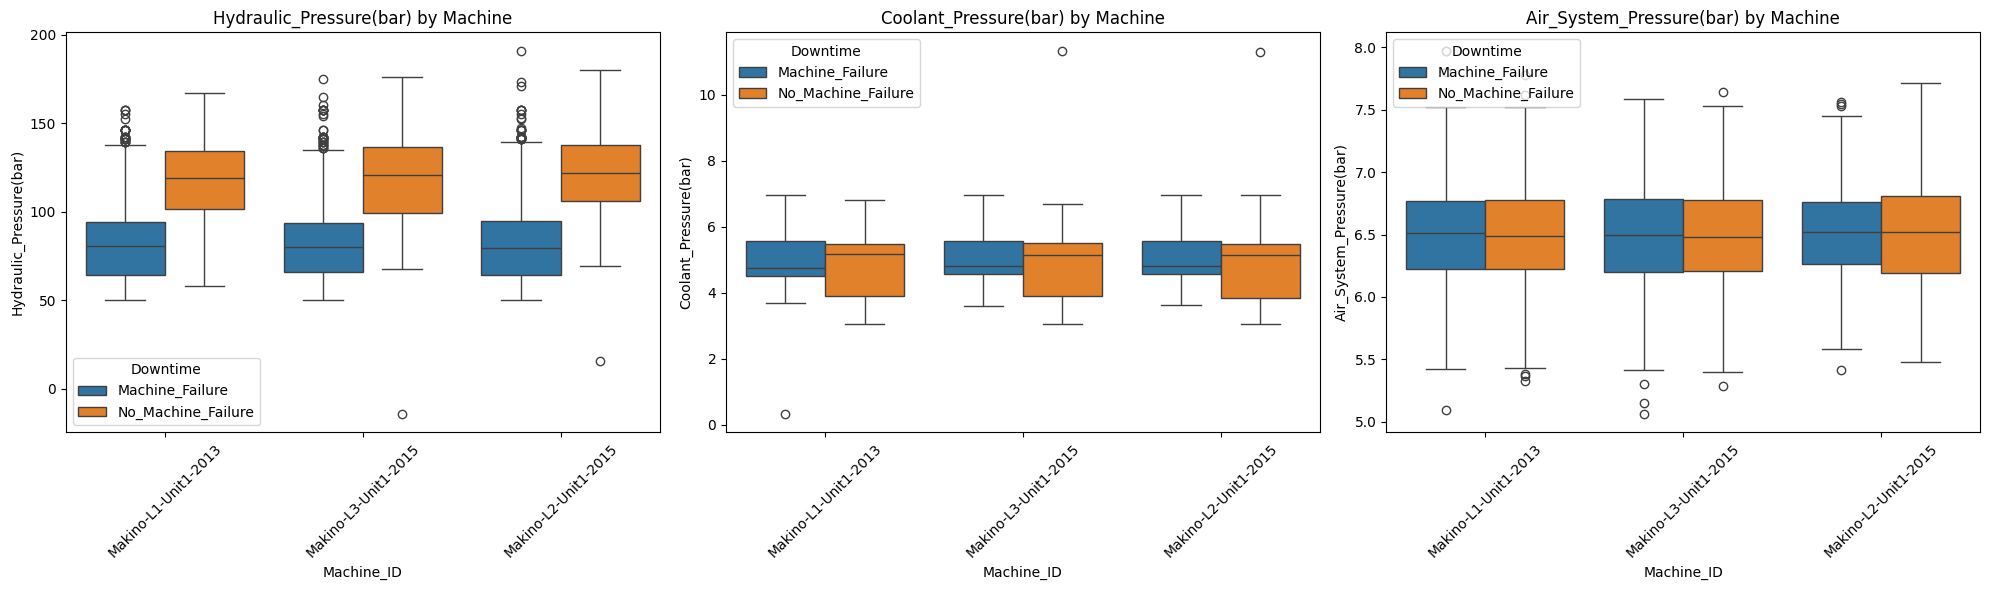

In [ ]:
# Pressure Systems Analysis
pressure_cols = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)']
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, col in enumerate(pressure_cols):
    sns.boxplot(data=eda_df, x='Machine_ID', y=col, hue='Downtime', ax=axes[i])
    axes[i].set_title(f'{col} by Machine')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()



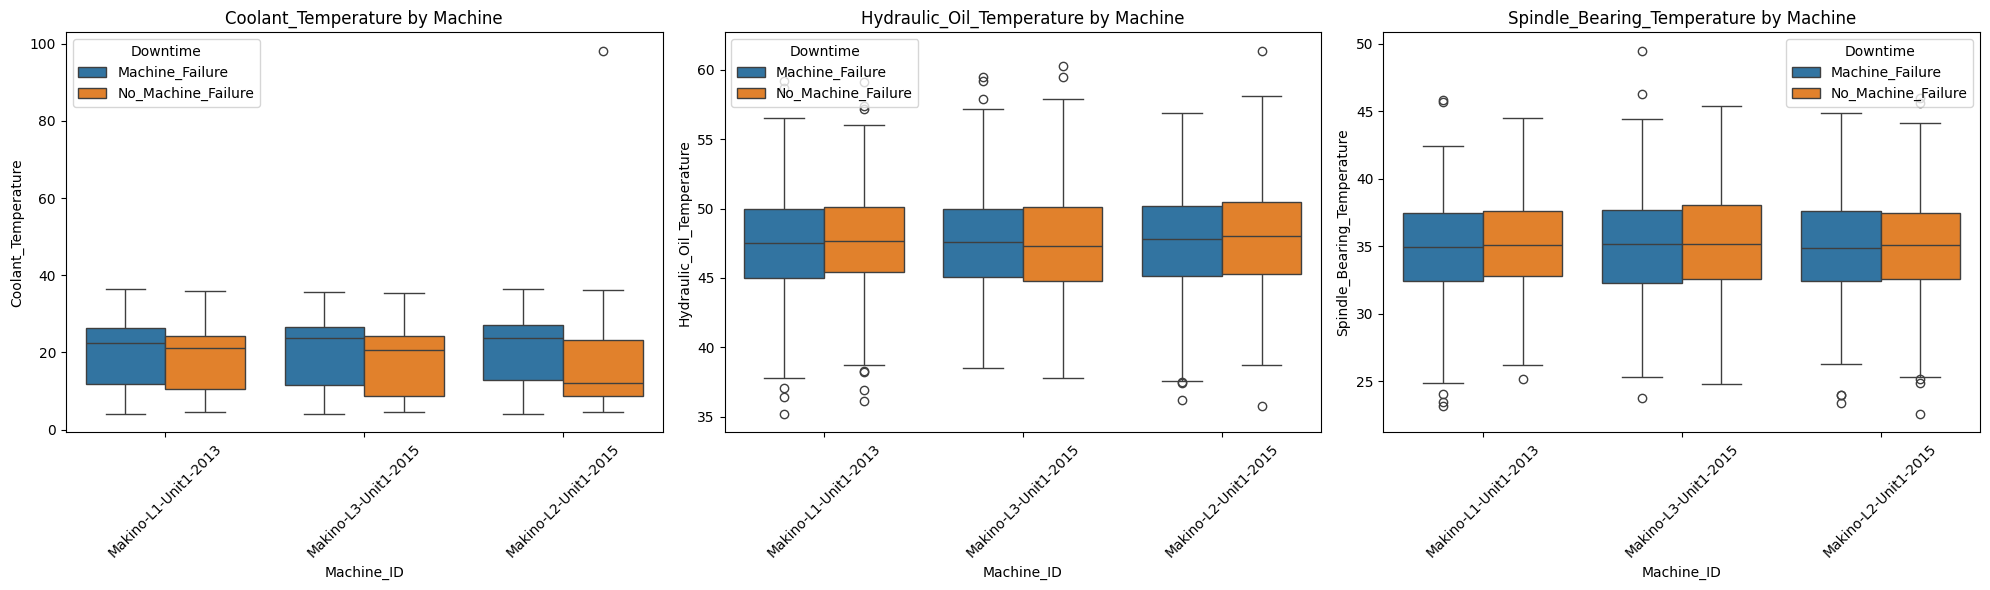

In [ ]:
# Temperature Analysis
temp_cols = ['Coolant_Temperature', 'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature']
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, col in enumerate(temp_cols):
    sns.boxplot(data=eda_df, x='Machine_ID', y=col, hue='Downtime', ax=axes[i])
    axes[i].set_title(f'{col} by Machine')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()



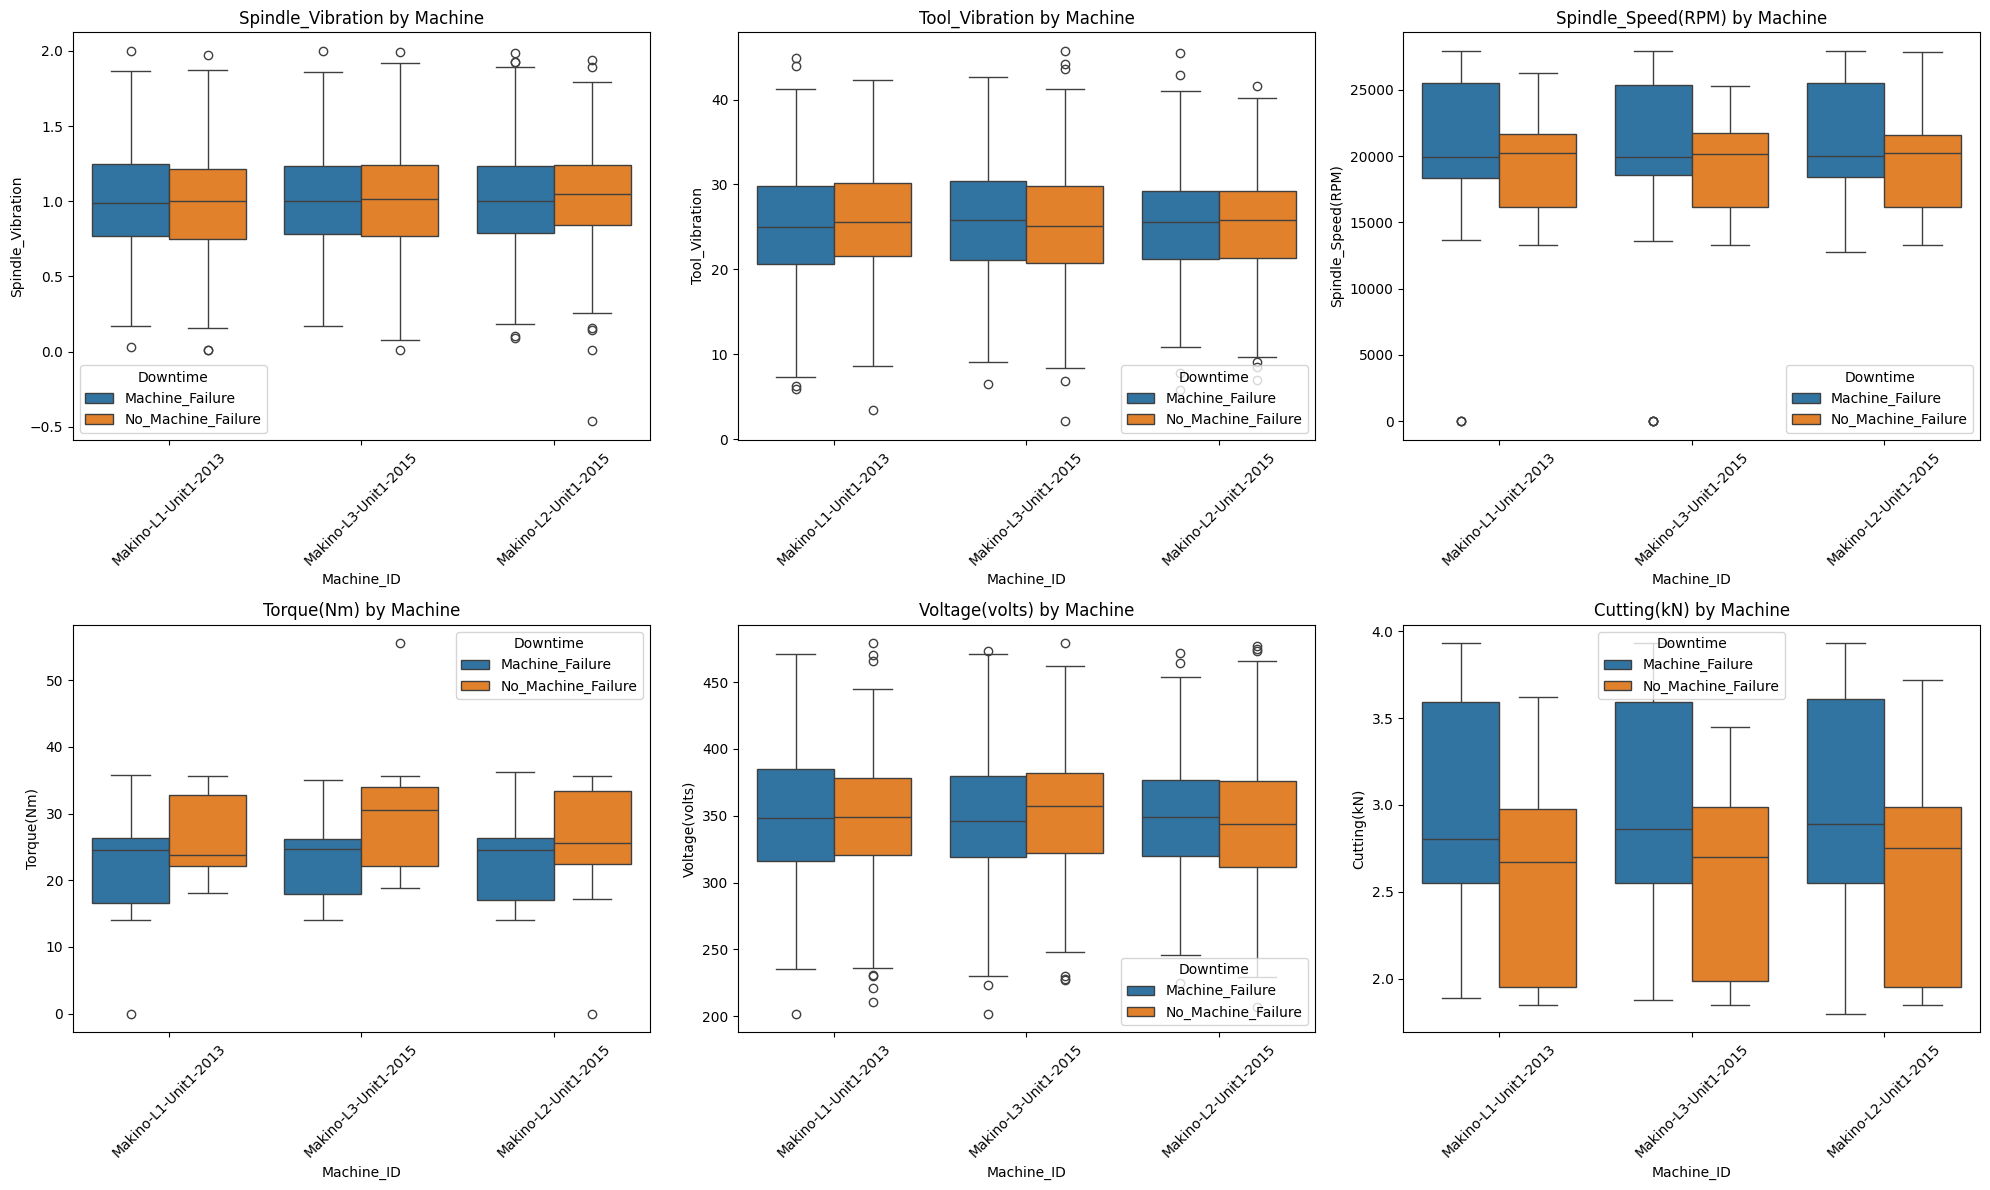

In [ ]:
# Vibration and Performance Metrics Analysis
performance_cols = ['Spindle_Vibration', 'Tool_Vibration', 'Spindle_Speed(RPM)', 'Torque(Nm)', 'Voltage(volts)', 'Cutting(kN)']
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()  # Flatten the 2x3 array for easier iteration

for i, col in enumerate(performance_cols):
    sns.boxplot(data=eda_df, x='Machine_ID', y=col, hue='Downtime', ax=axes[i])
    axes[i].set_title(f'{col} by Machine')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

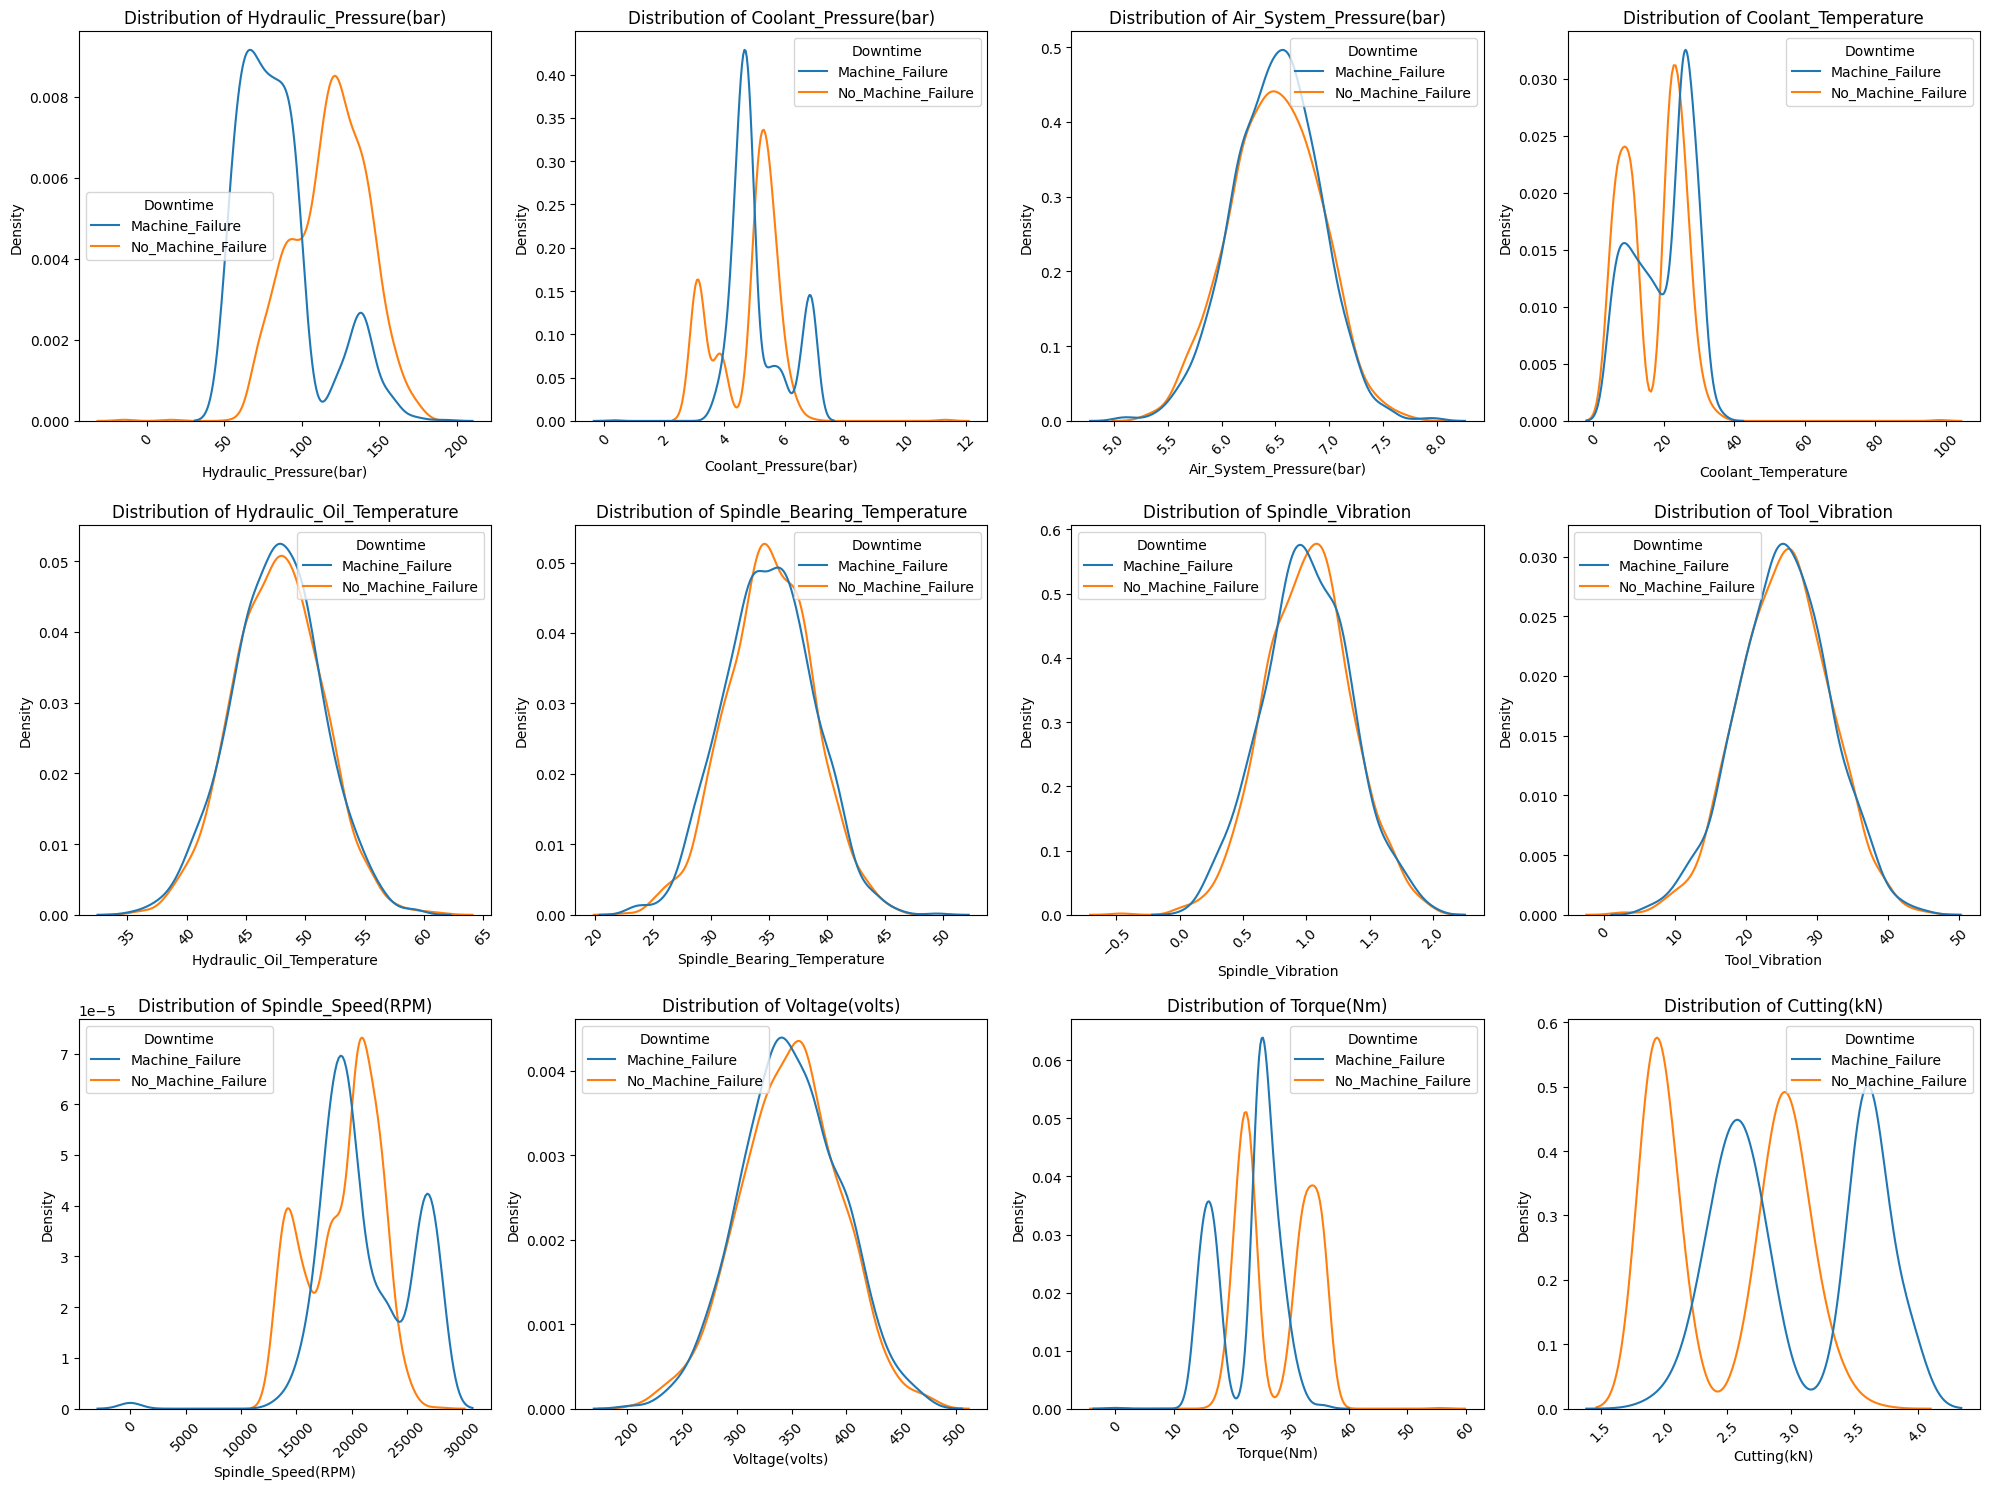

In [ ]:
# Distribution of measurements by downtime status
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

for idx, col in enumerate(eda_df.select_dtypes(include=['float64']).columns):
    sns.kdeplot(data=eda_df, x=col, hue='Downtime', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2500 non-null   object 
 1   Machine_ID                   2500 non-null   object 
 2   Assembly_Line_No             2500 non-null   object 
 3   Hydraulic_Pressure(bar)      2490 non-null   float64
 4   Coolant_Pressure(bar)        2481 non-null   float64
 5   Air_System_Pressure(bar)     2483 non-null   float64
 6   Coolant_Temperature          2488 non-null   float64
 7   Hydraulic_Oil_Temperature    2484 non-null   float64
 8   Spindle_Bearing_Temperature  2493 non-null   float64
 9   Spindle_Vibration            2489 non-null   float64
 10  Tool_Vibration               2489 non-null   float64
 11  Spindle_Speed(RPM)           2494 non-null   float64
 12  Voltage(volts)               2494 non-null   float64
 13  Torque(Nm)        


Numerical Features: ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 'Coolant_Temperature', 'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration', 'Tool_Vibration', 'Spindle_Speed(RPM)', 'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)']

Categorical Features: ['Machine_ID', 'Assembly_Line_No']

--------------------------------------------------

Training Logistic Regression:

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       253
           1       0.87      0.86      0.87       247

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500


Confusion Matrix:
[[222  31]
 [ 35 212]]


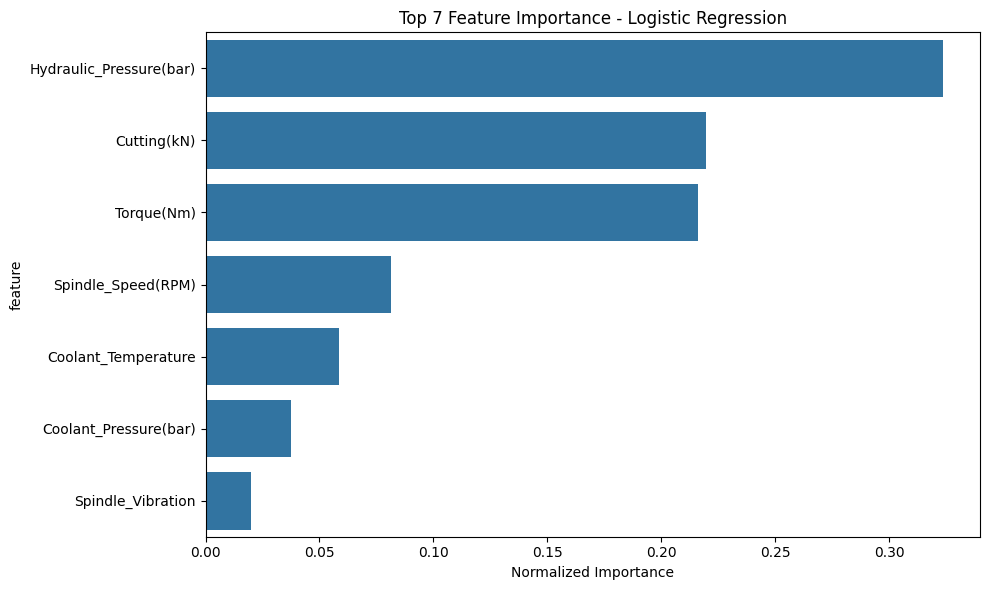


--------------------------------------------------

Training Random Forest:

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       253
           1       0.98      0.98      0.98       247

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500


Confusion Matrix:
[[247   6]
 [  4 243]]


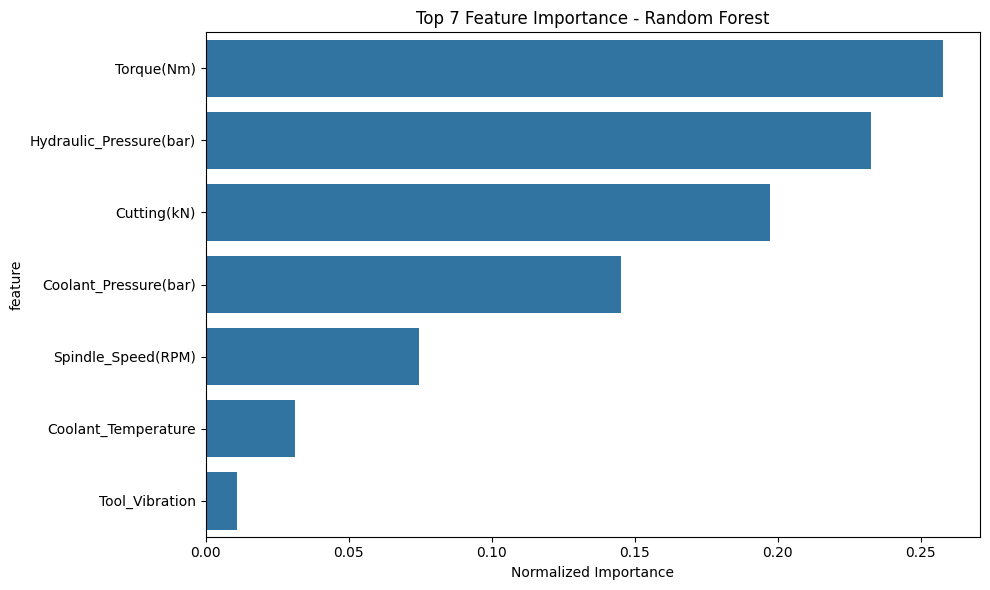


--------------------------------------------------

Training Gradient Boosting:

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       253
           1       0.98      0.99      0.99       247

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500


Confusion Matrix:
[[248   5]
 [  2 245]]


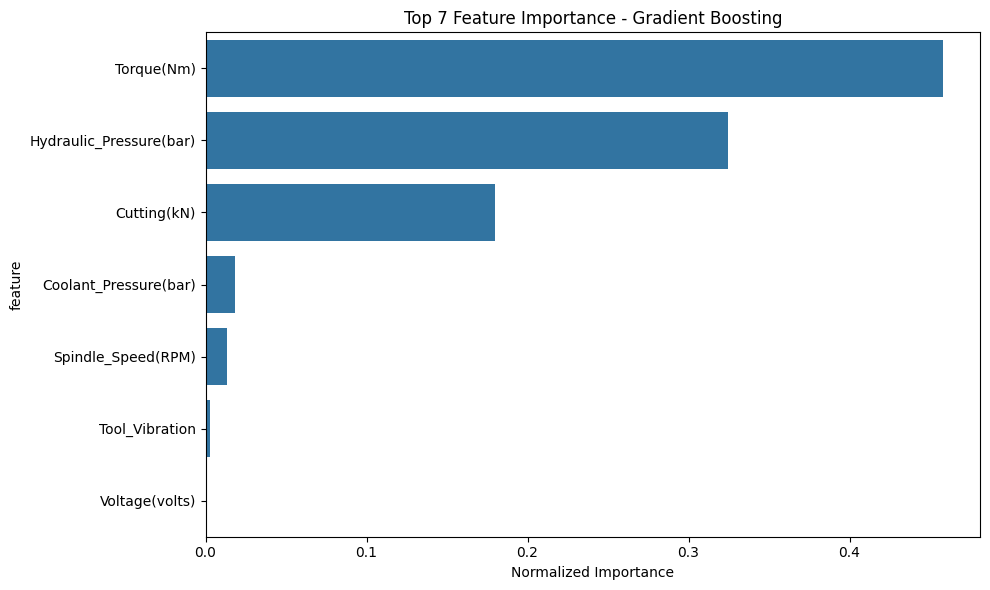

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# First separate features and target (dropping Date column)
X = df.drop(['Downtime', 'Date'], axis=1)
y = df['Downtime']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create label encoder for target
le = LabelEncoder()
le.fit(['No_Machine_Failure', 'Machine_Failure'])
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Identify feature types
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

print("\nNumerical Features:", list(numerical_features))
print("\nCategorical Features:", list(categorical_features))

# Create preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

# Create models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"\nTraining {name}:")

    # Create and train pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print evaluation metrics
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Get feature names
    encoded_features = preprocessor.named_transformers_['categorical'].named_steps['encoder'].get_feature_names_out(categorical_features)
    feature_names = list(numerical_features) + list(encoded_features)

    # Plot feature importance
    if hasattr(pipeline.named_steps['classifier'], 'feature_importances_'):
        importances = pipeline.named_steps['classifier'].feature_importances_
    elif hasattr(pipeline.named_steps['classifier'], 'coef_'):
        coef = pipeline.named_steps['classifier'].coef_[0]
        importances = np.abs(coef) / np.sum(np.abs(coef))  # Normalize to sum to 1

    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df.head(7), x='importance', y='feature')
    plt.title(f'Top 7 Feature Importance - {name}')
    plt.xlabel('Normalized Importance')
    plt.tight_layout()
    plt.show()